<a href="https://colab.research.google.com/github/Riyazzshaik/Gen-ai-day-4/blob/main/LR%26L0R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.isnull().sum()
#This is a fundamental step in data cleaning to understand
# the completeness of your dataset before further analysis or model training.

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


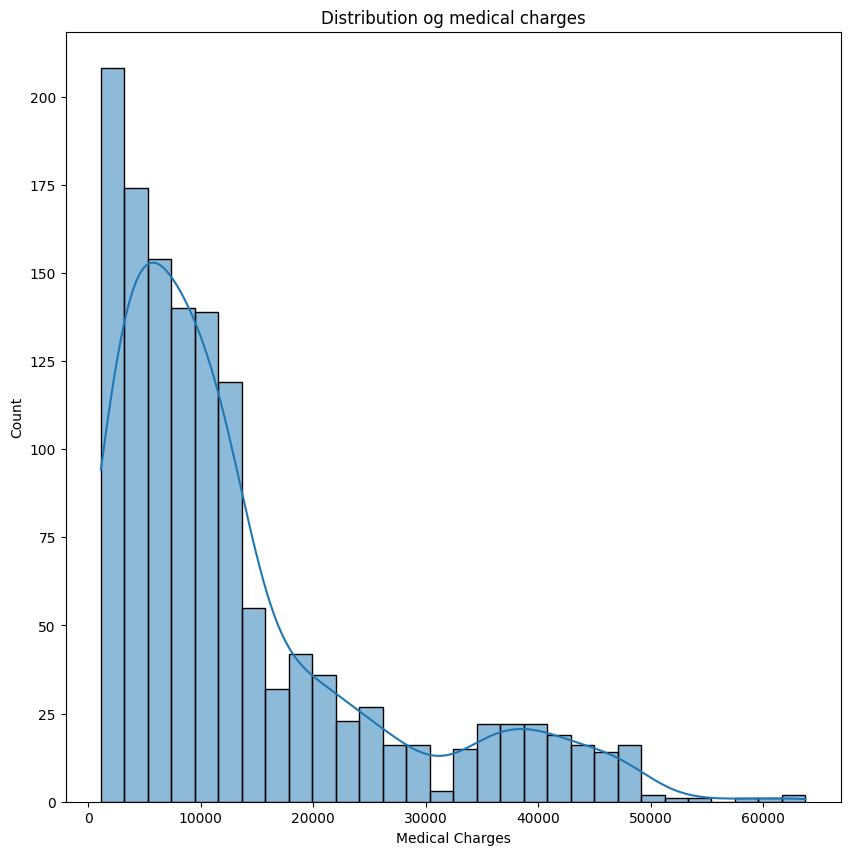

In [24]:
plt.figure(figsize=(10,10))
sns.histplot(df['charges'],kde=True)
plt.title("Distribution og medical charges")
plt.xlabel("Medical Charges")
plt.ylabel("Count")
plt.show()

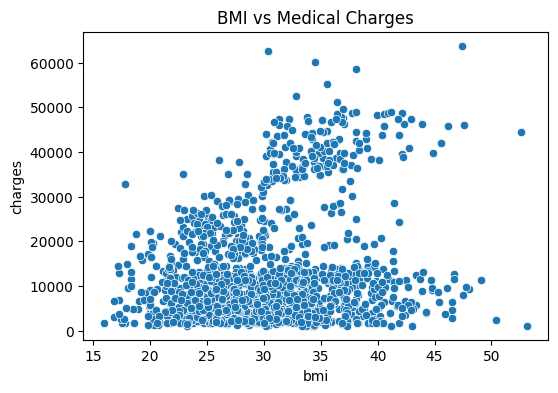

In [5]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='bmi', y='charges', data=df)
plt.title("BMI vs Medical Charges")
plt.show()


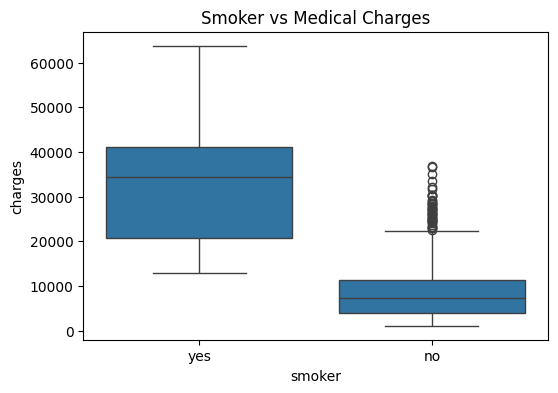

In [6]:
plt.figure(figsize=(6,4))
sns.boxplot(x='smoker', y='charges', data=df)
plt.title("Smoker vs Medical Charges")
plt.show()


In [7]:
df_encoded = pd.get_dummies(
    df,
    columns=['sex', 'smoker', 'region'],
    drop_first=True
)
df_encoded.head()


,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


In [27]:
X_linear = df_encoded.drop('charges', axis=1)
y_linear = df_encoded['charges']


In [26]:
from sklearn.model_selection import train_test_split

X_train_l, X_test_l, y_train_l, y_test_l = train_test_split(
    X_linear, y_linear, test_size=0.2, random_state=42
)

from sklearn.preprocessing import StandardScaler

scaler_l = StandardScaler()

X_train_l = scaler_l.fit_transform(X_train_l)
X_test_l = scaler_l.transform(X_test_l)


In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

lr_model = LinearRegression()
lr_model.fit(X_train_l, y_train_l)

y_pred_l = lr_model.predict(X_test_l)

print("R² Score:", r2_score(y_test_l, y_pred_l))
print("MSE:", mean_squared_error(y_test_l, y_pred_l))
#RMSE = sqrt(33,596,915.85) ≈ $5,796.28

R² Score: 0.7835929767120722
MSE: 33596915.851361476


In [11]:
#LOGISTIC REGRESSION PART
threshold = df_encoded['charges'].median()
df_encoded['high_risk'] = (df_encoded['charges'] > threshold).astype(int)

df_encoded['high_risk'].value_counts()


,count
high_risk,
1,669
0,669


In [12]:
X_log = df_encoded.drop(['charges', 'high_risk'], axis=1)
y_log = df_encoded['high_risk']


In [13]:
X_train_g, X_test_g, y_train_g, y_test_g = train_test_split(
    X_log, y_log, test_size=0.2, random_state=42
)

scaler_g = StandardScaler()

X_train_g = scaler_g.fit_transform(X_train_g)
X_test_g = scaler_g.transform(X_test_g)


In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_g, y_train_g)

y_pred_g = log_model.predict(X_test_g)

print(confusion_matrix(y_test_g, y_pred_g))
print(classification_report(y_test_g, y_pred_g))


[[132  14]
 [  9 113]]
              precision    recall  f1-score   support

           0       0.94      0.90      0.92       146
           1       0.89      0.93      0.91       122

    accuracy                           0.91       268
   macro avg       0.91      0.92      0.91       268
weighted avg       0.92      0.91      0.91       268



Conclusion:

Your Logistic Regression model shows strong performance. An overall accuracy of 91% is very good. More specifically, the model is quite effective at identifying both 'low risk' and 'high risk' patients, with high precision and recall scores for both classes. It has a slightly better recall for identifying high-risk patients (93%) than low-risk (90%), which could be beneficial depending on the business objective (e.g., if it's more critical to catch all high-risk cases even if a few low-risk are misclassified). The low numbers for false positives (14) and false negatives (9) also indicate a robust classifier.

In [15]:
#Overfitting & Regularization
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

for alpha in [0.1, 1, 10, 50]:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_l, y_train_l)

    train_r2 = r2_score(y_train_l, ridge.predict(X_train_l))
    test_r2  = r2_score(y_test_l,  ridge.predict(X_test_l))

    print(f"alpha={alpha} | Train R²={train_r2:.3f} | Test R²={test_r2:.3f}")


alpha=0.1 | Train R²=0.742 | Test R²=0.784
alpha=1 | Train R²=0.742 | Test R²=0.784
alpha=10 | Train R²=0.742 | Test R²=0.783
alpha=50 | Train R²=0.740 | Test R²=0.780


In [16]:
from sklearn.metrics import accuracy_score

for C in [0.01, 0.1, 1, 10]:
    log_reg = LogisticRegression(C=C, max_iter=1000)
    log_reg.fit(X_train_g, y_train_g)

    train_acc = accuracy_score(y_train_g, log_reg.predict(X_train_g))
    test_acc  = accuracy_score(y_test_g,  log_reg.predict(X_test_g))

    print(f"C={C} | Train Acc={train_acc:.3f} | Test Acc={test_acc:.3f}")


C=0.01 | Train Acc=0.903 | Test Acc=0.907
C=0.1 | Train Acc=0.903 | Test Acc=0.910
C=1 | Train Acc=0.906 | Test Acc=0.914
C=10 | Train Acc=0.907 | Test Acc=0.914


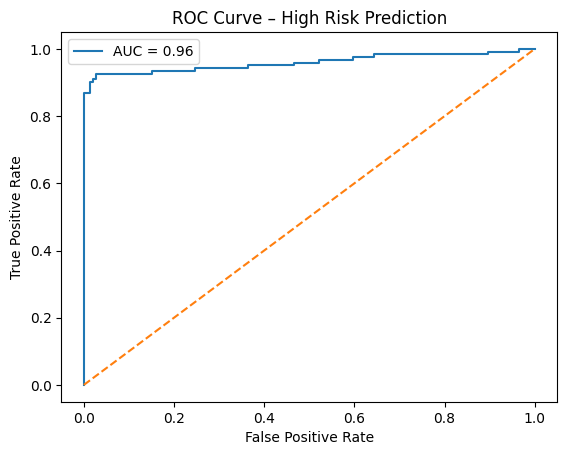

In [18]:
#ROC Curve & AUC (Logistic Regression)
y_prob_g = log_model.predict_proba(X_test_g)[:, 1]


from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test_g, y_prob_g)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – High Risk Prediction")
plt.legend()
plt.show()


AUC measures the entire two-dimensional area underneath the entire ROC curve. It provides an aggregate measure of performance across all possible classification thresholds.
An AUC of 1.0 represents a perfect classifier (100% TPR, 0% FPR).
An AUC of 0.5 means the classifier performs no better than random guessing.
An AUC greater than 0.5 typically indicates a useful classifier. Higher AUC values are generally better.

In [20]:
#Feature Importance & Interpretation
feature_names = X_linear.columns

coeff_df = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": lr_model.coef_
}).sort_values(by="Coefficient", ascending=False)

coeff_df

,Feature,Coefficient
4,smoker_yes,9558.481409
0,age,3614.975415
1,bmi,2036.228123
2,children,516.890247
3,sex_male,-9.293101
5,region_northwest,-158.140981
6,region_southeast,-290.157047
7,region_southwest,-349.110678


Concept of Coefficients: In Linear Regression, the coefficient for each feature represents the change in the predicted target variable (medical charges) for every one-unit increase in that feature, assuming all other features remain constant. A larger absolute value of the coefficient indicates a stronger impact (importance) of that feature on the prediction

In [21]:
log_coeff_df = pd.DataFrame({
    "Feature": X_log.columns,
    "Coefficient": log_model.coef_[0]
}).sort_values(by="Coefficient", ascending=False)

log_coeff_df


,Feature,Coefficient
4,smoker_yes,3.243946
0,age,2.186750
1,bmi,0.207216
2,children,0.108671
3,sex_male,-0.133780
5,region_northwest,-0.173652
6,region_southeast,-0.291029
7,region_southwest,-0.329953


Concept of Coefficients in Logistic Regression:

Unlike Linear Regression where coefficients directly show the change in the output value, in Logistic Regression, the coefficients represent the change in the log-odds of the positive class (in your case, high_risk=1) for a one-unit increase in the feature, holding other features constant.
Positive Coefficient: A positive coefficient means that as the feature value increases, the log-odds of being 'high risk' increase, which in turn means the probability of being 'high risk' increases.
Negative Coefficient: A negative coefficient means that as the feature value increases, the log-odds of being 'high risk' decrease, and thus the probability of being 'high risk' decreases.
Magnitude: The absolute magnitude of the coefficient indicates the strength of this relationship. Larger absolute values mean a stronger impact on the probability of being in the positive clas

Project Summary:
I built a healthcare analytics system using Linear Regression to predict medical insurance costs and Logistic Regression to identify high-risk patients. I performed feature encoding and scaling, evaluated regression performance using R² and MSE, and assessed classification performance using confusion matrix and ROC–AUC. I controlled overfitting using regularization techniques and interpreted feature importance to understand key risk drivers such as smoking and BMI.

🌐 PART 1: How to Convert Your ML Project into a Web App (Conceptual Guide)

You do NOT need to code now.
This is just to understand how ML goes to real users.

🧠 Big Picture: How an ML Web App Works

Think of it like this:

User → Web Page → ML Model → Prediction → Web Page


Your ML model becomes a brain, the website is the face.

🧩 Components of an ML Web App
1️⃣ Trained ML Models (You already have these ✅)

Linear Regression model → predicts medical cost

Logistic Regression model → predicts high-risk (Yes/No)

These are created in Jupyter/Colab.

2️⃣ Save the Models (Bridge between ML & Web)

After training, models are saved as files.

Conceptually:

import pickle

pickle.dump(lr_model, open("cost_model.pkl", "wb"))
pickle.dump(log_model, open("risk_model.pkl", "wb"))


📌 This allows the website to reuse your trained brain.

3️⃣ Backend (Flask / FastAPI)

This is where:

User input is received

Model is loaded

Prediction is made

Conceptually:

from flask import Flask, request, render_template
import pickle

app = Flask(__name__)

model = pickle.load(open("model.pkl", "rb"))

@app.route("/")
def home():
    return render_template("index.html")

@app.route("/predict", methods=["POST"])
def predict():
    data = request.form
    prediction = model.predict(...)
    return render_template("result.html", prediction=prediction)


📌 Backend connects user → model → result

4️⃣ Frontend (HTML Form)

User enters data like:

Age

BMI

Smoker

Children

Example (conceptually):

<form action="/predict" method="post">
  <input name="age">
  <input name="bmi">
  <input name="smoker">
  <button>Predict</button>
</form>

5️⃣ Output Page (Prediction Display)

The app shows:

Predicted insurance cost

Predicted risk probability

Example:

“Estimated Cost: ₹45,000
Risk Level: High (82%)”

🧠 How YOUR project fits perfectly

Your project already has:

Clean features

Scaled data

Interpretable models

So conversion to web app is straightforward when you’re ready.

🗂️ Typical Project Structure (For Later)
medical_app/
├── app.py
├── cost_model.pkl
├── risk_model.pkl
├── templates/
│   ├── index.html
│   └── result.html

🏁 Important Truth (Relax)

👉 You don’t need to deploy now
👉 Understanding the pipeline is enough for interviews
👉 Coding can be done later in 1–2 days

🎤 PART 2: INTERVIEW QUESTIONS (Based on THIS Project)

These are project-linked, not random theory.

🔹 Core Understanding
1️⃣ What problem did you solve?

Answer:
I built a healthcare analytics system that predicts medical insurance costs using Linear Regression and identifies high-risk patients using Logistic Regression.

2️⃣ Why did you use two different models?

Answer:
Because cost prediction is a regression problem (continuous output), while risk identification is a classification problem (binary output).

3️⃣ Why not use only one model?

Answer:
A single model cannot effectively handle both continuous prediction and binary decision-making with appropriate metrics.

🔹 Linear Regression Specific
4️⃣ What does your Linear Regression model predict?

Answer:
It predicts the expected medical insurance charges based on demographic and lifestyle factors.

5️⃣ How did you evaluate Linear Regression?

Answer:
Using R² score to measure explained variance and MSE to measure prediction error.

6️⃣ How did you handle overfitting?

Answer:
By using regularization (Ridge Regression) and comparing train vs test performance.

🔹 Logistic Regression Specific
7️⃣ What does Logistic Regression predict in your project?

Answer:
It predicts the probability that a patient is high-risk based on medical cost indicators.

8️⃣ Why did you use ROC–AUC?

Answer:
Because ROC–AUC evaluates model performance across all thresholds and is robust to class imbalance.

9️⃣ What is the role of the C parameter?

Answer:
It controls regularization strength. Smaller values apply stronger regularization to prevent overfitting.

🔹 Data & Features
🔟 Why did you encode categorical variables?

Answer:
ML models require numeric input, so categorical features were converted using one-hot encoding.

1️⃣1️⃣ Why did you scale features?

Answer:
Scaling ensures features contribute equally and helps optimization algorithms converge efficiently.

🔹 Practical & Real-World
1️⃣2️⃣ How would this system be useful in real life?

Answer:
It can help insurers estimate costs and identify high-risk patients early for preventive care.

1️⃣3️⃣ How would you improve this project further?

Answer:
By adding cross-validation, testing advanced models, and deploying it as a web application.

🧠 ONE SENTENCE THAT WINS INTERVIEWS

“I built a dual-model healthcare system using Linear Regression for cost prediction and Logistic Regression for risk classification, applying proper preprocessing, evaluation metrics, and regularization.”

Memorize this 👍